# **Importing all the libraries required**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import make_scorer, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

# **Reading CSV dataset**

In [3]:
weather_actuals=pd.read_csv("weather_actuals.csv")
wf=pd.read_csv("weather_forecast.csv")
weather_actuals=weather_actuals.iloc[:,3:32]
weather_actuals.head()
weather_actuals.rename(columns={'datetime_local':'datetime'},inplace=True)
weather_actuals.precip_type.unique()

array(['rain', '-9999', nan], dtype=object)

In [4]:
weather_actuals["precip_type"].fillna("no rain",inplace=True)
weather_actuals.precip_type.unique()

array(['rain', '-9999', 'no rain'], dtype=object)

In [5]:
power_actuals=pd.read_csv("power_actual.csv")
power_actuals

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0
...,...,...,...,...,...
70075,70075,2019-09-30 22:45:00,0.0,0.0,0.0
70076,70076,2019-09-30 23:00:00,0.0,0.0,0.0
70077,70077,2019-09-30 23:15:00,0.0,0.0,0.0
70078,70078,2019-09-30 23:30:00,0.0,0.0,0.0


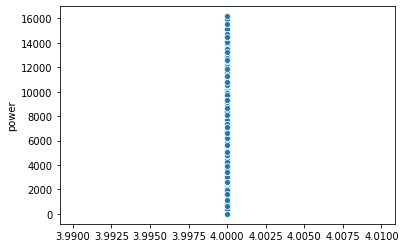

In [6]:
import seaborn as sns
sns.scatterplot(x=power_actuals.index[4],y='power',data=power_actuals);

In [7]:
weather_actuals

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,2017-10-01 00:00:00,0.00,26.52,26,1,19.46,308,0.83,-9999.0,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,2017-10-01 01:00:00,0.00,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2017-10-01 02:00:00,0.00,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,2017-10-01 03:00:00,0.00,23.84,23,1,18.66,270,0.45,-9999.0,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,2017-10-01 04:00:00,0.00,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614,2019-09-30 19:00:00,0.16,31.66,29,1,21.19,40,2.72,NaN,4.59,...,NaN,0.0,0.0,no rain,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
13615,2019-09-30 20:00:00,0.16,30.42,28,1,21.35,59,3.24,NaN,5.45,...,NaN,0.0,0.0,no rain,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
13616,2019-09-30 21:00:00,0.18,29.56,27,1,21.61,76,3.34,NaN,5.83,...,NaN,0.0,0.0,no rain,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
13617,2019-09-30 22:00:00,0.30,28.97,27,1,21.99,88,3.22,NaN,5.73,...,NaN,0.0,0.0,no rain,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46


# **Merging features and the corresponding Target files**

In [8]:
merged = pd.merge(weather_actuals,power_actuals,on='datetime',how='right',sort=True) #merge target(power_actuals) and features(weather_actuals) dataset
merged

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,...,visibility,sunrise,sunset,icon,summary,updated_at,Unnamed: 0,ghi,gti,power
0,2017-10-01 00:00:00,0.00,26.52,26.0,1.0,19.46,308.0,0.83,-9999.0,-9999.00,...,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0,0.0,0.0,0.0
1,2017-10-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0
2,2017-10-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0
3,2017-10-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,0.0,0.0
4,2017-10-01 01:00:00,0.00,28.78,27.0,1.0,20.06,-9999.0,-9999.00,-9999.0,-9999.00,...,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,2019-09-30 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70075,0.0,0.0,0.0
70076,2019-09-30 23:00:00,0.35,28.15,26.0,1.0,22.09,95.0,3.14,NaN,6.03,...,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46,70076,0.0,0.0,0.0
70077,2019-09-30 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70077,0.0,0.0,0.0
70078,2019-09-30 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70078,0.0,0.0,0.0


# **Data PreProcessing**

In [9]:
merged.fillna(method="ffill",inplace=True)

In [10]:
merged=merged.replace([-9999,-9999.0,-9999.00,'-9999'],np.nan) #Removing all the negative values with null values

In [11]:
merged.shape

(70080, 32)

In [12]:
merged.dropna(how='all',axis=1,inplace=True)
merged.shape

(70080, 25)

In [13]:
merged.dropna(inplace=True)
merged.shape

(39840, 25)

In [14]:
merged.columns

Index(['datetime', 'cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust',
       'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at', 'Unnamed: 0', 'ghi', 'gti', 'power'],
      dtype='object')

In [15]:
numericalFeatures = merged.select_dtypes(include = [np.number])
print("The number of numerical features is: {}".format(numericalFeatures.shape[1]))

The number of numerical features is: 18


In [16]:
numericalFeatures.columns

Index(['cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'Unnamed: 0', 'ghi', 'gti', 'power'],
      dtype='object')

In [17]:
categoricalFeatures = merged.select_dtypes(exclude = [np.number])
print("The number of categorical features is: {}".format(categoricalFeatures.shape[1]))

The number of categorical features is: 7


In [18]:
categoricalFeatures.columns

Index(['datetime', 'precip_type', 'sunrise', 'sunset', 'icon', 'summary',
       'updated_at'],
      dtype='object')

In [19]:
merged['precip_type_en'] = LabelEncoder().fit_transform(merged['precip_type'])
merged[['precip_type', 'precip_type_en']]

,precip_type,precip_type_en
13064,rain,1
13065,rain,1
13066,rain,1
13067,rain,1
13068,rain,1
...,...,...
70075,no rain,0
70076,no rain,0
70077,no rain,0
70078,no rain,0


# **Converting Categorical Values into Numerical values using Label Encoder**

In [20]:
merged['icon_encoded'] = LabelEncoder().fit_transform(merged['icon'])
merged[['icon', 'icon_encoded']] # special syntax to get just these two columns

,icon,icon_encoded
13064,fog,3
13065,fog,3
13066,fog,3
13067,fog,3
13068,fog,3
...,...,...
70075,partly-cloudy-night,5
70076,partly-cloudy-night,5
70077,partly-cloudy-night,5
70078,partly-cloudy-night,5


In [21]:
merged['summary_encoded'] = LabelEncoder().fit_transform(merged['summary'])
merged[['summary', 'summary_encoded']]

,summary,summary_encoded
13064,Foggy,1
13065,Foggy,1
13066,Foggy,1
13067,Foggy,1
13068,Foggy,1
...,...,...
70075,Partly Cloudy,11
70076,Partly Cloudy,11
70077,Partly Cloudy,11
70078,Partly Cloudy,11


In [22]:
merged['sunset']=pd.to_datetime(merged['sunset'])
merged['sunrise']=pd.to_datetime(merged['sunrise'])
merged['datetime']=pd.to_datetime(merged['datetime'])
merged["daylight"]=(merged["sunset"]-merged['sunrise']).dt.total_seconds() #to get the daylight time in seconds

In [23]:
merged

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,...,summary,updated_at,Unnamed: 0,ghi,gti,power,precip_type_en,icon_encoded,summary_encoded,daylight
13064,2018-02-14 02:00:00,0.00,13.60,14.0,1.0,9.07,318.0,2.88,3.32,1023.86,...,Foggy,2019-07-16 16:37:16,13064,0.0,0.0,0.0,1,3,1,40145.0
13065,2018-02-14 02:15:00,0.00,13.60,14.0,1.0,9.07,318.0,2.88,3.32,1023.86,...,Foggy,2019-07-16 16:37:16,13065,0.0,0.0,0.0,1,3,1,40145.0
13066,2018-02-14 02:30:00,0.00,13.60,14.0,1.0,9.07,318.0,2.88,3.32,1023.86,...,Foggy,2019-07-16 16:37:16,13066,0.0,0.0,0.0,1,3,1,40145.0
13067,2018-02-14 02:45:00,0.00,13.60,14.0,1.0,9.07,318.0,2.88,3.32,1023.86,...,Foggy,2019-07-16 16:37:16,13067,0.0,0.0,0.0,1,3,1,40145.0
13068,2018-02-14 03:00:00,0.09,11.66,12.0,1.0,9.24,322.0,1.15,3.33,1024.28,...,Foggy,2019-07-16 16:37:16,13068,0.0,0.0,0.0,1,3,1,40145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,2019-09-30 22:45:00,0.30,28.97,27.0,1.0,21.99,88.0,3.22,5.73,1008.76,...,Partly Cloudy,2019-10-01 23:32:46,70075,0.0,0.0,0.0,0,5,11,42938.0
70076,2019-09-30 23:00:00,0.35,28.15,26.0,1.0,22.09,95.0,3.14,6.03,1008.61,...,Partly Cloudy,2019-10-01 23:32:46,70076,0.0,0.0,0.0,0,5,11,42938.0
70077,2019-09-30 23:15:00,0.35,28.15,26.0,1.0,22.09,95.0,3.14,6.03,1008.61,...,Partly Cloudy,2019-10-01 23:32:46,70077,0.0,0.0,0.0,0,5,11,42938.0
70078,2019-09-30 23:30:00,0.35,28.15,26.0,1.0,22.09,95.0,3.14,6.03,1008.61,...,Partly Cloudy,2019-10-01 23:32:46,70078,0.0,0.0,0.0,0,5,11,42938.0


In [24]:
merged.drop(['precip_type','icon', 'summary','updated_at','sunrise','sunset','Unnamed: 0'],axis=1,inplace=True)

In [25]:
print(merged.isnull().sum())

datetime                0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
ghi                     0
gti                     0
power                   0
precip_type_en          0
icon_encoded            0
summary_encoded         0
daylight                0
dtype: int64


In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [27]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')

In [28]:
merged.describe()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,precip_intensity,precip_probability,visibility,ghi,gti,power,precip_type_en,icon_encoded,summary_encoded,daylight
count,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,...,39840.000000,39840.000000,39840.000000,39840.0,39840.0,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000
mean,0.294431,28.483699,26.523293,0.484438,12.473111,175.742671,2.860808,4.272168,1008.273054,1.884237,...,0.060565,0.019075,15.865318,0.0,0.0,48.079623,0.284237,2.012751,3.643373,43925.348394
std,0.365198,10.263681,8.503925,0.499764,10.253390,111.740583,1.197692,2.202793,7.876514,2.945620,...,0.255784,0.056608,1.537346,0.0,0.0,660.872422,0.451056,1.856883,4.295321,4368.350660
min,0.000000,4.310000,6.000000,0.000000,-20.560000,0.000000,0.150000,0.630000,991.660000,0.000000,...,0.000000,0.000000,0.480000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,37051.000000
25%,0.000000,20.137500,20.000000,0.000000,4.960000,84.000000,1.950000,2.700000,1001.320000,0.000000,...,0.000000,0.000000,16.090000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,39841.000000
50%,0.070000,29.610000,28.000000,0.000000,11.440000,139.000000,2.650000,3.750000,1008.025000,0.000000,...,0.000000,0.000000,16.090000,0.0,0.0,0.000000,0.000000,1.000000,2.000000,44256.000000
75%,0.600000,36.750000,33.000000,1.000000,22.840000,295.000000,3.530000,5.400000,1015.170000,3.000000,...,0.010000,0.010000,16.090000,0.0,0.0,5.930000,1.000000,4.000000,6.000000,47772.000000
max,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,...,6.220000,0.730000,16.090000,0.0,0.0,16172.040000,1.000000,6.000000,17.000000,50375.000000


In [29]:
merged.drop(merged[merged['power']>40].index,inplace=True)

In [30]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39563 entries, 13064 to 70079
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              39563 non-null  datetime64[ns]
 1   cloud_cover           39563 non-null  float64       
 2   apparent_temperature  39563 non-null  float64       
 3   temperature           39563 non-null  float64       
 4   humidity              39563 non-null  float64       
 5   dew_point             39563 non-null  float64       
 6   wind_bearing          39563 non-null  float64       
 7   wind_speed            39563 non-null  float64       
 8   wind_gust             39563 non-null  float64       
 9   pressure              39563 non-null  float64       
 10  uv_index              39563 non-null  float64       
 11  ozone                 39563 non-null  float64       
 12  precip_intensity      39563 non-null  float64       
 13  precip_proba

In [31]:
merged.describe()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,precip_intensity,precip_probability,visibility,ghi,gti,power,precip_type_en,icon_encoded,summary_encoded,daylight
count,39563.000000,39563.000000,39563.000000,39563.000000,39563.000000,39563.000000,39563.000000,39563.000000,39563.000000,39563.000000,...,39563.000000,39563.000000,39563.000000,39563.0,39563.0,39563.000000,39563.000000,39563.000000,39563.000000,39563.000000
mean,0.291726,28.404935,26.489498,0.481359,12.375095,176.076208,2.851965,4.262229,1008.340821,1.867502,...,0.058071,0.018159,15.876495,0.0,0.0,3.174206,0.281172,2.001769,3.621212,43889.753204
std,0.364023,10.245576,8.518082,0.499659,10.221526,111.939181,1.194249,2.204017,7.860649,2.938071,...,0.250850,0.054257,1.509277,0.0,0.0,4.974935,0.449577,1.852068,4.284660,4362.767473
min,0.000000,4.310000,6.000000,0.000000,-20.560000,0.000000,0.150000,0.630000,991.660000,0.000000,...,0.000000,0.000000,0.480000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,37051.000000
25%,0.000000,20.080000,20.000000,0.000000,4.900000,84.000000,1.950000,2.690000,1001.410000,0.000000,...,0.000000,0.000000,16.090000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,39841.000000
50%,0.060000,29.530000,28.000000,0.000000,11.350000,139.000000,2.640000,3.740000,1008.120000,0.000000,...,0.000000,0.000000,16.090000,0.0,0.0,0.000000,0.000000,1.000000,2.000000,44218.000000
75%,0.590000,36.675000,33.000000,1.000000,22.720000,296.000000,3.520000,5.375000,1015.230000,3.000000,...,0.010000,0.010000,16.090000,0.0,0.0,5.660000,1.000000,4.000000,6.000000,47684.000000
max,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,...,6.220000,0.730000,16.090000,0.0,0.0,18.340000,1.000000,6.000000,17.000000,50375.000000


In [32]:
merged.shape

(39563, 22)

In [33]:
merged.drop(['dew_point','wind_bearing','apparent_temperature','wind_gust','precip_probability','ghi','gti','pressure','uv_index'],axis=1,inplace=True)

# **Visualizing the datasets**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C681EEBFC8>,
      dtype=object)

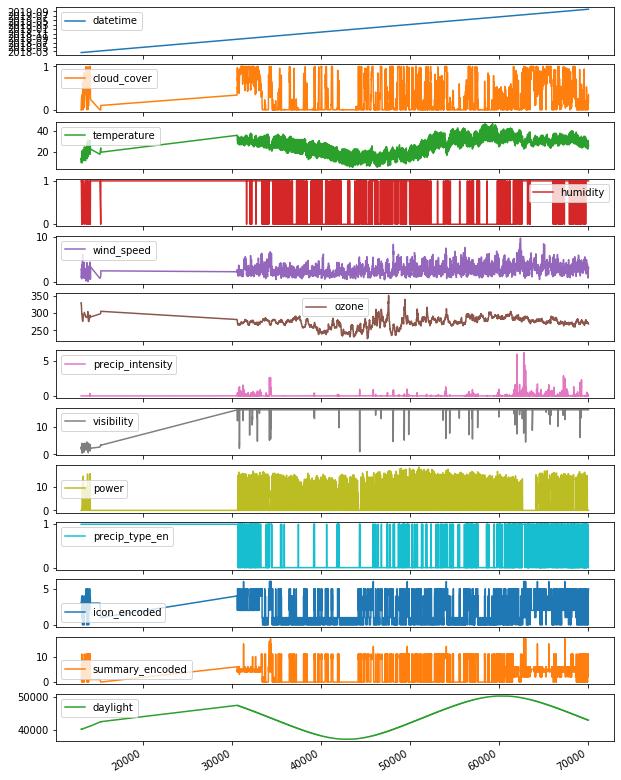

In [34]:
merged.plot(subplots=True,figsize = (10,15) )

In [35]:
merged.columns

Index(['datetime', 'cloud_cover', 'temperature', 'humidity', 'wind_speed',
       'ozone', 'precip_intensity', 'visibility', 'power', 'precip_type_en',
       'icon_encoded', 'summary_encoded', 'daylight'],
      dtype='object')

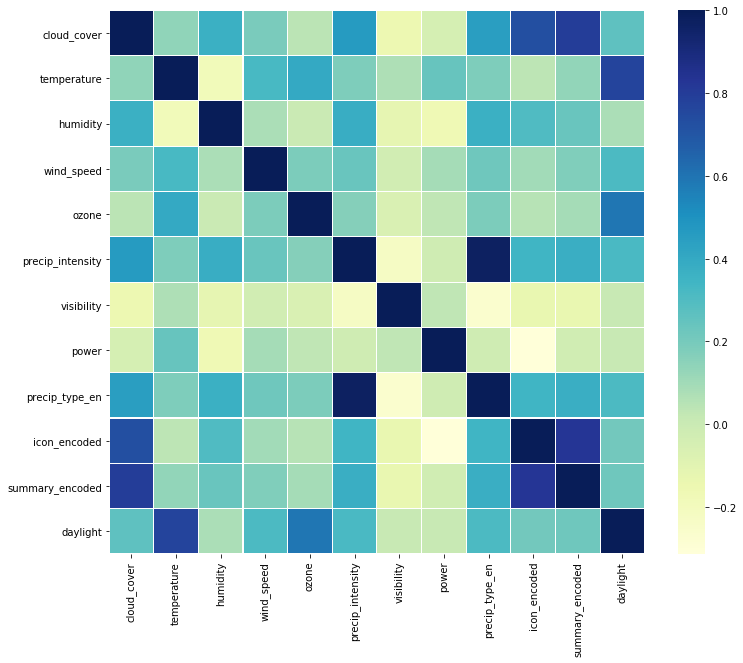

In [36]:
corrmat = merged.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [37]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39563 entries, 13064 to 70079
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          39563 non-null  datetime64[ns]
 1   cloud_cover       39563 non-null  float64       
 2   temperature       39563 non-null  float64       
 3   humidity          39563 non-null  float64       
 4   wind_speed        39563 non-null  float64       
 5   ozone             39563 non-null  float64       
 6   precip_intensity  39563 non-null  float64       
 7   visibility        39563 non-null  float64       
 8   power             39563 non-null  float64       
 9   precip_type_en    39563 non-null  int32         
 10  icon_encoded      39563 non-null  int32         
 11  summary_encoded   39563 non-null  int32         
 12  daylight          39563 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int32(3)
memory usage: 3.8 MB


In [38]:
data=merged[['datetime','cloud_cover', 'temperature', 'humidity',
       'wind_speed', 'ozone',
       'precip_intensity', 'visibility', 'power',
       'precip_type_en', 'icon_encoded', 'summary_encoded', 'daylight']]

In [39]:
X=data.drop(['datetime','power'],axis=1)

In [40]:
y=data['power']

# **Splitting Datasets into training and testing set using train_test_split function**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [42]:
sc = StandardScaler() # standardizing a feature by subtracting the mean and then scaling to unit variance.
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [43]:
def test_model(model, x_train, y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [44]:
def rsme(model, x, y):
    cv_scores = -cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

# **Linear Regression Model**

In [45]:
LR = LinearRegression()
acc_LR = test_model(LR, X_train, y_train)

LR_rsme = rsme(LR, X_train, y_train)


print('Score: {:.5f}'.format((acc_LR[0])))
print('RSME: {:.5f}'.format(LR_rsme.mean()))

Score: 0.19492
RSME: 4.46322


In [46]:
LR.fit(X_train,y_train)
y_pred1=LR.predict(X_test)
for i in range(len(y_pred1)):
    if y_pred1[i]<1:
        y_pred1[i]=0

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
df.head()

,Actual,Predicted
65161,0.00,1.976603
35451,0.71,2.557362
55691,0.00,2.126565
41818,0.00,6.479974
59201,6.78,7.417961


# **Support Vector Regressor**

In [48]:
svr_reg = SVR(kernel='rbf')
acc_SVR = test_model(svr_reg, X_train, y_train)

svr_rsme = rsme(svr_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_SVR[0])))
print('RSME: {:.5f}'.format(svr_rsme.mean()))

Score: 0.33615
RSME: 4.00179


In [49]:
svr_reg.fit(X_train,y_train)
y_pred2=svr_reg.predict(X_test)
for i in range(len(y_pred2)):
    if y_pred2[i]<1:
        y_pred2[i]=0

In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df.head()

,Actual,Predicted
65161,0.00,3.093743
35451,0.71,0.000000
55691,0.00,0.000000
41818,0.00,4.418907
59201,6.78,3.213125


# **Decision Tree Regressor**

In [51]:
dt_reg = DecisionTreeRegressor(random_state=21)
acc_tree = test_model(dt_reg, X_train, y_train)

dt_rsme = rsme(dt_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_tree[0])))
print('RSME: {:.5f}'.format(dt_rsme.mean()))

Score: 0.86361
RSME: 1.45967


In [52]:
dt_reg.fit(X_train,y_train)
y_pred3=dt_reg.predict(X_test)
for i in range(len(y_pred3)):
    if y_pred3[i]<1:
        y_pred3[i]=0

In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
df.tail(20)

,Actual,Predicted
68166,0.00,0.000000
49868,0.00,0.000000
46614,15.49,15.653333
33723,0.70,0.000000
44724,0.00,0.000000
43097,0.00,0.000000
41199,0.00,0.000000
67721,11.46,11.820000
48448,8.66,4.616667
13294,13.95,0.000000


(array([13056., 13060., 13064., 13068., 13072., 13076., 13080., 13084.,
        13088., 13092., 13096., 13100., 13104., 13108., 13112., 13116.,
        13120., 13124., 13128., 13132., 13136., 13140., 13144., 13148.,
        13152., 13156., 13160.]),
 <a list of 27 Text xticklabel objects>)

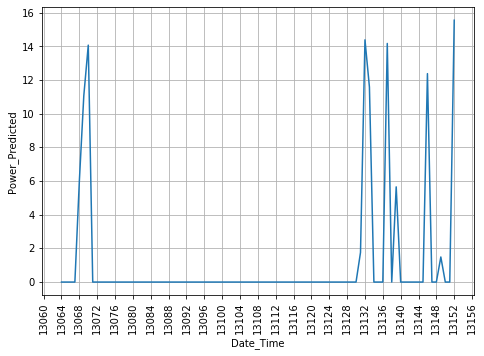

In [54]:
from matplotlib.ticker import FuncFormatter,MaxNLocator
fig,ax=plt.subplots()
ax=fig.add_axes([0,0,1,1])
ax.grid(True)
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_xlabel('Date_Time')
ax.set_ylabel('Power_Predicted')
ax.plot(merged.index[0:45],y_pred3[0:45])
plt.xticks(rotation='vertical')

# **Random Forest Regressor**

In [55]:
rf_reg = RandomForestRegressor(n_estimators =10, random_state=51)
acc_rf = test_model(rf_reg, X_train, y_train)

rf_rsme = rsme(rf_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_rf[0])))
print('RSME: {:.5f}'.format(rf_rsme.mean()))

Score: 0.86905
RSME: 1.50878


In [56]:
rf_reg.fit(X_train,y_train)
y_pred4=rf_reg.predict(X_test)
for i in range(len(y_pred4)):
    if y_pred4[i]<1:
        y_pred4[i]=0

In [57]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
df.head()

,Actual,Predicted
65161,0.00,0.000000
35451,0.71,0.000000
55691,0.00,0.000000
41818,0.00,0.000000
59201,6.78,5.450858


(array([13056., 13060., 13064., 13068., 13072., 13076., 13080., 13084.,
        13088., 13092., 13096., 13100., 13104., 13108., 13112., 13116.,
        13120., 13124., 13128., 13132., 13136., 13140., 13144., 13148.,
        13152., 13156., 13160.]),
 <a list of 27 Text xticklabel objects>)

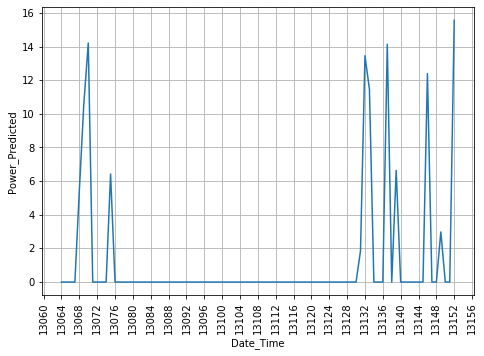

In [58]:
from matplotlib.ticker import FuncFormatter,MaxNLocator
fig,ax=plt.subplots()
ax=fig.add_axes([0,0,1,1])
ax.grid(True)
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_xlabel('Date_Time')
ax.set_ylabel('Power_Predicted')
ax.plot(merged.index[0:45],y_pred4[0:45])
plt.xticks(rotation='vertical')

# **Comparing all the models**

In [59]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regressor', 
              'Decision Tree', 'Random Forest'],
    'Score': [acc_LR[0], acc_SVR[0], acc_tree[0], acc_rf[0]],
    'RSME': [LR_rsme[0], svr_rsme[0], dt_rsme[0], rf_rsme[0]]
             })

result = results.sort_values(by='RSME', ascending=True)
result = result.set_index('Model')
display(result.head(8))

,Score,RSME
Model,,
Decision Tree,0.863613,1.497682
Random Forest,0.869052,1.503955
Support Vector Regressor,0.336154,4.109378
Linear Regression,0.194916,4.531913


# **Predicting generated Power on Weather_forecast file**

In [60]:
wf=pd.read_csv("weather_forecast.csv")
wf=wf.iloc[:,3:]
wf.shape
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime_local        648 non-null    object 
 1   cloud_cover           648 non-null    float64
 2   apparent_temperature  648 non-null    float64
 3   temperature           648 non-null    int64  
 4   humidity              648 non-null    int64  
 5   dew_point             648 non-null    float64
 6   wind_bearing          648 non-null    int64  
 7   wind_speed            648 non-null    float64
 8   wind_chill            0 non-null      float64
 9   wind_gust             648 non-null    float64
 10  heat_index            0 non-null      float64
 11  pressure              648 non-null    float64
 12  qpf                   0 non-null      float64
 13  uv_index              648 non-null    int64  
 14  snow                  0 non-null      float64
 15  pop                   0

In [61]:
wf.describe()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,...,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,0.0,648.000000,0.0,...,0.0,648.000000,0.0,0.0,0.0,648.000000,0.0,648.000000,648.000000,6.480000e+02
mean,0.140340,27.562423,27.302469,0.513889,14.789244,144.282407,2.214614,NaN,3.462068,NaN,...,NaN,1.591049,NaN,NaN,NaN,275.790432,NaN,0.007608,0.002423,1.609000e+01
std,0.273487,4.596587,4.535063,0.500193,3.616508,116.665398,0.756552,NaN,1.533301,NaN,...,NaN,2.451580,NaN,NaN,NaN,3.228630,NaN,0.032064,0.006543,1.102192e-13
min,0.000000,18.300000,18.000000,0.000000,2.950000,0.000000,0.600000,NaN,0.840000,NaN,...,NaN,0.000000,NaN,NaN,NaN,262.800000,NaN,0.000000,0.000000,1.609000e+01
25%,0.000000,23.817500,24.000000,0.000000,12.620000,51.750000,1.700000,NaN,2.370000,NaN,...,NaN,0.000000,NaN,NaN,NaN,274.300000,NaN,0.000000,0.000000,1.609000e+01
50%,0.000000,27.155000,27.000000,1.000000,14.900000,109.000000,2.175000,NaN,3.100000,NaN,...,NaN,0.000000,NaN,NaN,NaN,276.100000,NaN,0.000000,0.000000,1.609000e+01
75%,0.110000,31.942500,32.000000,1.000000,17.182500,273.500000,2.682500,NaN,4.050000,NaN,...,NaN,3.000000,NaN,NaN,NaN,277.600000,NaN,0.000000,0.000000,1.609000e+01
max,1.000000,36.340000,36.000000,1.000000,22.350000,359.000000,4.430000,NaN,10.540000,NaN,...,NaN,8.000000,NaN,NaN,NaN,284.900000,NaN,0.420000,0.060000,1.609000e+01


In [62]:
wf.precip_type.unique()

array([nan, 'rain'], dtype=object)

In [63]:
wf["precip_type"].fillna("no rain",inplace=True)
wf.precip_type.unique()

array(['no rain', 'rain'], dtype=object)

In [64]:
wf['icon_encoded'] = LabelEncoder().fit_transform(wf['icon'])
wf[['icon', 'icon_encoded']] # special syntax to get just these two columns
wf['summary_encoded'] = LabelEncoder().fit_transform(wf['summary'])
wf[['summary', 'summary_encoded']] # special syntax to get just these two columns

,summary,summary_encoded
0,Partly Cloudy,4
1,Partly Cloudy,4
2,Partly Cloudy,4
3,Partly Cloudy,4
4,Partly Cloudy,4
...,...,...
643,Clear,0
644,Clear,0
645,Clear,0
646,Clear,0


In [65]:
wf['precip_type_en'] = LabelEncoder().fit_transform(wf['precip_type'])
wf[['precip_type', 'precip_type_en']]

,precip_type,precip_type_en
0,no rain,0
1,no rain,0
2,no rain,0
3,no rain,0
4,no rain,0
...,...,...
643,no rain,0
644,no rain,0
645,no rain,0
646,no rain,0


In [66]:
wf['sunset']=pd.to_datetime(wf['sunset'])
wf['sunrise']=pd.to_datetime(wf['sunrise'])

wf["daylight"]=(wf["sunset"]-wf['sunrise']).dt.total_seconds()

In [67]:
wf.columns

Index(['datetime_local', 'cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill',
       'wind_gust', 'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop',
       'fctcode', 'ozone', 'precip_accumulation', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at', 'icon_encoded', 'summary_encoded',
       'precip_type_en', 'daylight'],
      dtype='object')

In [68]:
wf.rename(columns={'datetime_local':'datetime'},inplace=True)
#wf.set_index('datetime', inplace=True) 

In [69]:
wf.drop(['dew_point','wind_chill','heat_index','pressure','uv_index','wind_bearing','qpf','snow','pop','fctcode','precip_accumulation','precip_type','sunrise','sunset','icon','summary','updated_at'],axis=1,inplace=True)
wf.head()

,datetime,cloud_cover,apparent_temperature,temperature,humidity,wind_speed,wind_gust,ozone,precip_intensity,precip_probability,visibility,icon_encoded,summary_encoded,precip_type_en,daylight
0,2019-10-01 00:00:00,0.35,26.41,26,1,3.08,6.42,268.6,0.0,0.0,16.09,4,4,0,42835.0
1,2019-10-01 01:00:00,0.43,25.95,25,1,2.94,6.28,269.1,0.0,0.0,16.09,4,4,0,42835.0
2,2019-10-01 02:00:00,0.48,25.46,25,1,2.82,6.08,269.7,0.0,0.0,16.09,4,4,0,42835.0
3,2019-10-01 03:00:00,0.49,24.80,24,1,2.63,5.74,270.4,0.0,0.0,16.09,4,4,0,42835.0
4,2019-10-01 04:00:00,0.49,23.99,23,1,2.39,5.30,271.3,0.0,0.0,16.09,4,4,0,42835.0


In [70]:
wf.drop(['apparent_temperature','wind_gust','precip_probability'],axis=1,inplace=True)
print(wf.isnull().sum())

datetime            0
cloud_cover         0
temperature         0
humidity            0
wind_speed          0
ozone               0
precip_intensity    0
visibility          0
icon_encoded        0
summary_encoded     0
precip_type_en      0
daylight            0
dtype: int64


In [71]:
wf=wf.dropna()
wf.set_index('datetime', inplace=True)
wf['output']=dt_reg.predict(wf)
pred=wf['output']
for i in range(len(pred)):
    if pred[i]<1:
        pred[i]=0
prediction=wf[["output" ]]
prediction.rename(columns={'output':'power_predicted'},inplace=True)

In [72]:
prediction

,power_predicted
datetime,
2019-10-01 00:00:00,0.00
2019-10-01 01:00:00,0.00
2019-10-01 02:00:00,0.00
2019-10-01 03:00:00,0.00
2019-10-01 04:00:00,0.00
...,...
2019-10-27 19:00:00,10.53
2019-10-27 20:00:00,10.53
2019-10-27 21:00:00,10.53


## XGBRegressor

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [82]:
XGB_reg = xgb.XGBRegressor()
result = XGB_reg.fit(X_train, y_train)
y_pred = XGB_reg.predict(X_test)
acc_XGB = test_model(XGB_reg, X_train, y_train)

XGB_rsme = rsme(XGB_reg, X_train, y_train)


print('Score: {:.5f}'.format((acc_XGB[0])))
print('RSME: {:.5f}'.format(XGB_rsme.mean()))

Score: 0.74928
RSME: 2.41766


##### Here we can see that XGBoost out performs Linear Regression and SVM regressor with the accuracy of 74.92%.

In [83]:
XGB_reg.fit(X_train,y_train)
y_pred2=XGB_reg.predict(X_test)
for i in range(len(y_pred2)):
    if y_pred2[i]<1:
        y_pred2[i]=0

In [84]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df.head()

,Actual,Predicted
65161,0.00,3.952136
35451,0.71,0.000000
55691,0.00,0.000000
41818,0.00,0.000000
59201,6.78,6.507314


# **Predicting generated Power on Weather_forecast file**

In [92]:
wf=pd.read_csv("weather_forecast.csv")
wf=wf.iloc[:,3:]
wf["precip_type"].fillna("no rain",inplace=True)
wf['icon_encoded'] = LabelEncoder().fit_transform(wf['icon'])
wf[['icon', 'icon_encoded']] # special syntax to get just these two columns
wf['summary_encoded'] = LabelEncoder().fit_transform(wf['summary'])
wf[['summary', 'summary_encoded']] # special syntax to get just these two columns
wf['precip_type_en'] = LabelEncoder().fit_transform(wf['precip_type'])
wf[['precip_type', 'precip_type_en']]
wf['sunset']=pd.to_datetime(wf['sunset'])
wf['sunrise']=pd.to_datetime(wf['sunrise'])

wf["daylight"]=(wf["sunset"]-wf['sunrise']).dt.total_seconds()
wf.rename(columns={'datetime_local':'datetime'},inplace=True)
#wf.set_index('datetime', inplace=True)
wf.drop(['dew_point','wind_chill','heat_index','pressure','uv_index','wind_bearing','qpf','snow','pop','fctcode','precip_accumulation','precip_type','sunrise','sunset','icon','summary','updated_at'],axis=1,inplace=True)
wf.drop(['apparent_temperature','wind_gust','precip_probability'],axis=1,inplace=True)
print(wf.isnull().sum())

datetime            0
cloud_cover         0
temperature         0
humidity            0
wind_speed          0
ozone               0
precip_intensity    0
visibility          0
icon_encoded        0
summary_encoded     0
precip_type_en      0
daylight            0
dtype: int64


In [93]:
wf = wf[['datetime','cloud_cover', 'temperature', 'humidity', 'wind_speed', 'ozone',
       'precip_intensity', 'visibility', 'precip_type_en', 'icon_encoded',
       'summary_encoded', 'daylight']]

In [94]:
wf=wf.dropna()
wf.set_index('datetime', inplace=True)
wf['output']=XGB_reg.predict(wf)
pred=wf['output']
for i in range(len(pred)):
    if pred[i]<1:
        pred[i]=0
prediction_XGB=wf[["output" ]]
prediction_XGB.rename(columns={'output':'power_predicted'},inplace=True)

In [96]:
prediction_XGB

,power_predicted
datetime,
2019-10-01 00:00:00,5.063916
2019-10-01 01:00:00,4.682110
2019-10-01 02:00:00,4.585095
2019-10-01 03:00:00,4.866596
2019-10-01 04:00:00,4.272113
...,...
2019-10-27 19:00:00,0.000000
2019-10-27 20:00:00,0.000000
2019-10-27 21:00:00,0.000000


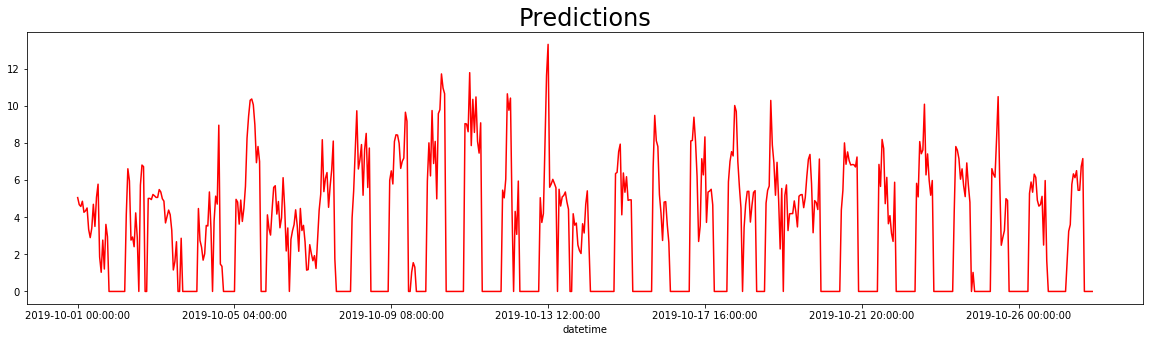

In [100]:
prediction_XGB.power_predicted.plot(figsize = (20,5), color = "red");
plt.title("Predictions", size = 24);